# How AI is impacting Software Engineering Jobs

## Goals

- Are AI tools (e.g. Chat GPT, GitHub Copilot etc) impacting Software Engineering jobs?

- Has the amount increased / decreased / stayed the same?

# Hypothesis

- Cyclical
    - I think companies hire more at the start of the year, and it may fluctuate throughout the year

- Short term
    - I doubt AI will have reduced the need for software engineers in its current state (a human is still required to piece things together)

- Long term
    - Perhaps AI tools will improve and the entry level software engineer jobs will be less available (or the requirements for the role changes)

## Approach
- Metric
    - The number of job openings over time

- Test
    - If it has changed after a certain point in time (when AI became more widely adopted)

- Decide on what to comparison against
    - A trend
    - Other job categories that are plausibly unaffected by AI
    - Pre-post AI comparison

- Find Data
    - Pinpoint when AI became a bigger topic
    - Find recent dataset from which we can see job openings in a given time period + what we're comparing against

- Bonus
    - Predict future trends

## AI tool release dates

The two big players are:
- Chat GPT, **released 30th November 2022** ([Source](https://en.wikipedia.org/wiki/ChatGPT#:~:text=by%20OpenAI%20and-,launched%20on%20November%2030%2C%202022,-.%20Based%20on%20a))
- GitHub Copilot, **released 29th March 2022** ([Source](Visual Studio 2022 IDE on March 29, 2022))
    - Note: It was released earlier on JetBrains IDE's, but this [isn't the most popular IDE](https://pypl.github.io/IDE.html)

## Data Collection

### FRED - Federal Reserve Bank of St. Louis

[Software Development Job Postings on Indeed - United States](https://fred.stlouisfed.org/series/IHLIDXUSTPSOFTDEVE)

[Software Development Job Postings on Indeed - United Kingdom](https://fred.stlouisfed.org/series/IHLIDXGBTPSOFTDEVE)

There are few considerations for these datasets:
- They're limited to job postings on [Indeed](https://uk.indeed.com)
- The units are **"Index Feb, 1 2020=100, Seasonally Adjusted**" (more info on how this is calculated below)
    - This means that `100` is whatever value it was on Feb 1 2020, and it's relative to that
    - Sesonally Adjus

Note: FRED has a [page with information on how to understand the data](https://fredhelp.stlouisfed.org/#fred-data-understanding-the-data)

---

ONS
- https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/datasets/employmentbyoccupationemp04
    - Discontinued... Moved to Nomis

Nomis
- https://www.nomisweb.co.uk/home/profiles.asp
- https://www.nomisweb.co.uk/datasets/aps218/reports/employment-by-occupation?compare=K02000001
- https://www.nomisweb.co.uk/datasets/aps218/reports/employment-by-status-and-occupation?compare=K02000001

In [8]:
import pandas as pd

raw_data = pd.read_csv(
    "./datasets/fred-software-development-jobs-indeed-us.csv", 
    parse_dates=[0],
    index_col=0
)

df = pd.DataFrame(raw_data)

df

,IHLIDXUSTPSOFTDEVE
DATE,
2020-02-01,100.00
2020-02-02,99.75
2020-02-03,99.55
2020-02-04,99.29
2020-02-05,99.22
...,...
2024-01-01,73.82
2024-01-02,73.58
2024-01-03,73.40


The index is defined as:

> Indeed calculates the index change in seasonally-adjusted job postings since February 1, 2020, the pre-pandemic baseline. Indeed seasonally adjusts each series based on historical patterns in 2017, 2018, and 2019. Each series, including the national trend, occupational sectors, and sub-national geographies, is seasonally adjusted separately. Indeed switched to this new methodology in December 2022 and now reports all historical data using this new methodology. Historical numbers have been revised and may differ significantly from originally reported values. The new methodology applies a detrended seasonal adjustment factor to the index change in job postings. For more information, see Frequently Asked Questions regarding Indeed Data.

The column name for the index seems to be a code for this economic data, let's change it

In [3]:
(
    df
    .rename(columns={"IHLIDXUSTPSOFTDEVE":"index"})
    .rename_axis('date')
)

,index
date,
2020-02-01,100.00
2020-02-02,99.75
2020-02-03,99.55
2020-02-04,99.29
2020-02-05,99.22
...,...
2024-01-01,73.82
2024-01-02,73.58
2024-01-03,73.40


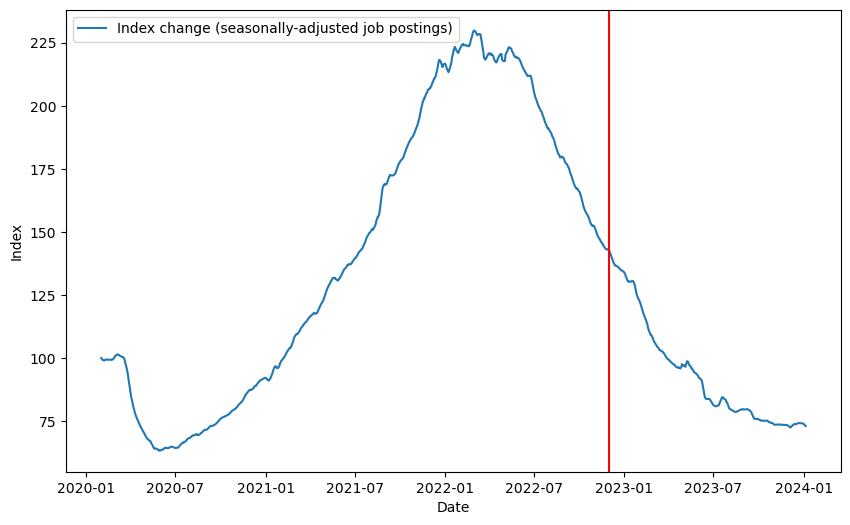

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df, label="Index change (seasonally-adjusted job postings)")
plt.axvline(pd.Timestamp('2022-11-30'),color='r')
plt.xlabel("Date")
plt.ylabel("Index")
plt.legend()
plt.show()

We see here that the software engineering job postings seem to peek in 2022

Next:
- UK stats
- When was AI mainstream
- Other stats